<a href="https://colab.research.google.com/github/anil-kk/deeplearning/blob/master/PyTorch_Fashion_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

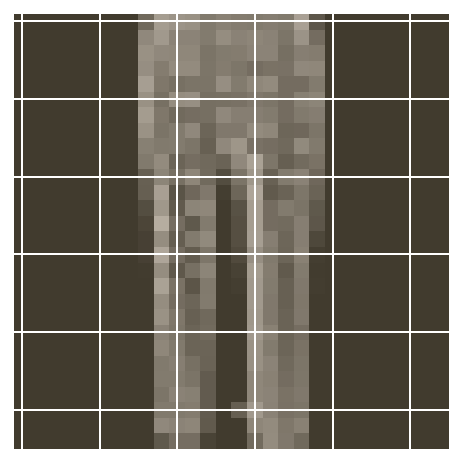

In [10]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

class Classify(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256) # 256 nodes
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    
    x = x.view(x.shape[0], -1) # flatten input tensor, batch size is first parameter to view method
    
    x = F.relu(self.fc1(x)) # ReLU activation function
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1) # across columns
    
    return x
  
#Neural Network
model = Classify()

#define criterion and optimizer
criterion = nn.NLLLoss() # Negative Log Likelihood Loss
optimizer = optim.Adam(model.parameters(), lr=0.004) #momentum, speeds up fitting process, adjusts learning rate to individual parameters


# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# download and load training data
trainset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

image, label = next(iter(train_loader))
helper.imshow(image[0,:]);
      

  

In [11]:
#TRAIN
epochs = 5

for e in range(epochs):
  loss_accum = 0
  for images, labels in train_loader:
    
    log_probabilities = model(images) # forward
    loss = criterion(log_probabilities, labels)
    
    optimizer.zero_grad()
    loss.backward()#backward
    optimizer.step()
    
    loss_accum += loss.item()
  else:
      print(f"Training loss: {loss_accum}")
      

Training loss: 484.599537268281
Training loss: 377.89519622921944
Training loss: 345.98354372382164
Training loss: 321.99300480633974
Training loss: 306.682968724519


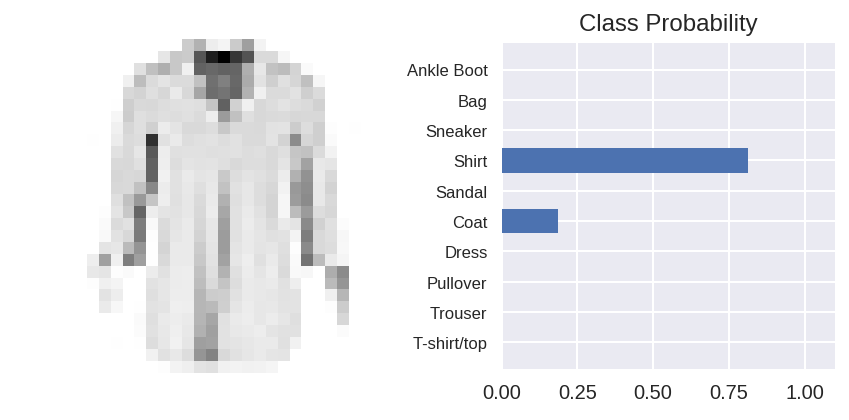

In [16]:
   #TEST   
      
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import helper

data_iter = iter(test_loader)

images, labels = data_iter.next()

img = images[1]

probabilities = torch.exp(model(img))

helper.view_classify(img, probabilities, version='Fashion')